In [290]:
# Import some libs
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl as op

In [291]:
# read data
#df = pd.read_excel('data/5 - Muesli Project raw data.xlsx', skiprows=1) # remove first row

df_orders = pd.read_csv('data/5 - Muesli Project raw data - Orders.csv', skiprows=1)
df_campaigns = pd.read_csv('data/5 - Muesli Project raw data - Campaign Data.csv')
df_intern_data = pd.read_csv('data/5 - Muesli Project raw data - InternData Study.csv')
df_process_data = pd.read_csv('data/5 - Muesli Project raw data - Order Process Data.csv')

#df_process_data.head(20)

In [292]:
# clean up data - replace ' ' with '_'

cols = df_orders.columns.tolist()
cols = [col.replace(' ', '_') for col in cols]
df_orders.columns = cols

cols = df_campaigns.columns.tolist()
cols = [col.replace(' ', '_') for col in cols]
df_campaigns.columns = cols

cols = df_intern_data.columns.tolist()
cols = [col.replace(' ', '_') for col in cols]
df_intern_data.columns = cols

cols = df_process_data.columns.tolist()
cols = [col.replace(' ', '_') for col in cols]
df_process_data.columns = cols

#df_process_data.head(20)


In [293]:
# clean up - data - convert date string to datetime obj.

df_orders['Order_Date'] = pd.to_datetime(df_orders['Order_Date'], dayfirst=True, format="%d/%m/%y", infer_datetime_format=True)

df_campaigns['Arrival_Scan_Date'] = pd.to_datetime(df_campaigns['Arrival_Scan_Date'], dayfirst=True, format="%d/%m/%y", infer_datetime_format=True)

df_intern_data['Ready_to_Ship_Date'] = pd.to_datetime(df_intern_data['Ready_to_Ship_Date'], dayfirst=True, format="%d/%m/%y", infer_datetime_format=True)
df_intern_data['Pickup_Date'] = pd.to_datetime(df_intern_data['Pickup_Date'], dayfirst=True, format="%d/%m/%y", infer_datetime_format=True)

df_process_data['Order_Date'] = pd.to_datetime(df_process_data['Order_Date'], dayfirst=True, format="%d/%m/%y", infer_datetime_format=True)
df_process_data['On_Truck_Scan_Date'] = pd.to_datetime(df_process_data['On_Truck_Scan_Date'], dayfirst=True, format="%d/%m/%y", infer_datetime_format=True)

#df_process_data.head(20)

In [294]:
# find duplicates and remove

df_orders.drop(['Index'], axis=1, inplace=True)
df_orders.drop_duplicates(inplace=True)
#df_orders.duplicated().value_counts()

df_intern_data.drop_duplicates(inplace=True) 
#df_intern_data.duplicated().value_counts()

df_process_data.drop(['Row_ID'], axis=1, inplace=True)
df_process_data.drop_duplicates(inplace=True)
#df_process_data.duplicated().value_counts()

In [295]:
#make copies of data ...
df_orders_data = df_orders.copy()
df_express_data = df_process_data.copy()
df_standard_data = df_process_data.copy()

In [102]:
# KPI - Lead time Order > Arrrival

# create new DF from Orders and Campaigns (Order_ID, Order_Date, Arrival_Scan_Date)
x = df_orders[["Order_ID", "Order_Date"]]
x.drop_duplicates(inplace=True)

df_lead_time = pd.merge(
    pd.DataFrame(x),
    pd.DataFrame(df_campaigns[["Order_ID", "Arrival_Scan_Date"]]),
    on='Order_ID',
    how='inner'
)

df_lead_time['Duration'] =  df_lead_time['Arrival_Scan_Date'] - df_lead_time['Order_Date']

#df_lead_time.duplicated().value_counts()

df_lead_time.head(20)

/var/folders/39/wgdpps3j1cgbbz8__bqxd_q00000gn/T/ipykernel_25738/3980452758.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop_duplicates(inplace=True)


,Order_ID,Order_Date,Arrival_Scan_Date,Duration
0,CA-2019-145625,2019-09-11,2019-09-23,12 days
1,CA-2019-162138,2019-04-23,2019-05-06,13 days
2,CA-2019-169166,2019-05-09,2019-05-20,11 days
3,CA-2020-131954,2020-01-21,2020-02-03,13 days
4,CA-2019-102981,2019-09-06,2019-09-16,10 days
5,CA-2019-168081,2019-04-24,2019-05-06,12 days
6,CA-2019-119186,2019-05-26,2019-05-31,5 days
7,CA-2019-124485,2019-11-24,2019-12-02,8 days
8,CA-2020-115994,2020-01-28,2020-02-06,9 days
9,CA-2019-106530,2019-05-08,2019-05-13,5 days


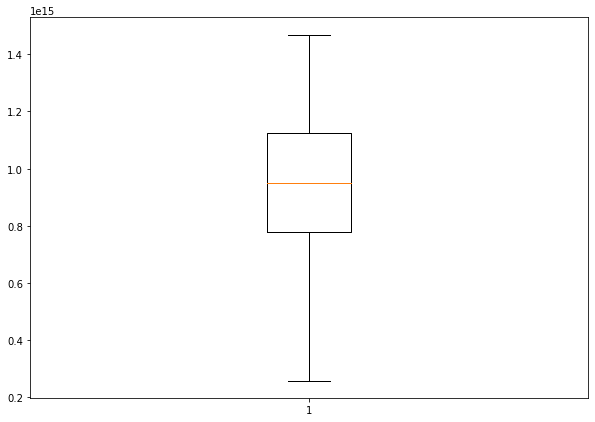

In [107]:
# Box Plot
plt.figure(figsize =(10, 7))
plt.boxplot(df_lead_time['Duration'])
plt.show()

In [238]:
df_lead_time['Duration'].describe()

count                           333
mean     10 days 20:02:09.729729729
std       2 days 20:41:39.045324279
min                 3 days 00:00:00
25%                 9 days 00:00:00
50%                11 days 00:00:00
75%                13 days 00:00:00
max                17 days 00:00:00
Name: Duration, dtype: object

In [313]:
# Filter Ship_Mode
df_express_data.query('Ship_Mode == "Express"', inplace = True)
df_standard_data.query('Ship_Mode == "Standard Processing"', inplace = True)

In [314]:
a = df_orders_data[["Order_ID", "Order_Date"]]
b = df_express_data[['Order_ID','Ship_Mode']]
c = df_standard_data[['Order_ID','Ship_Mode']]
d = df_campaigns[["Order_ID", "Arrival_Scan_Date"]]

df_express_lead_time = pd.merge(
    pd.DataFrame(a),
    pd.DataFrame(b) ,
    on='Order_ID',
    how='inner'
)

express = pd.merge(
    pd.DataFrame(df_express_lead_time),
    pd.DataFrame(d) ,
    on='Order_ID',
    how='inner'
)

express['Duration'] =  express['Arrival_Scan_Date'] - express['Order_Date']

df_standard_lead_time = pd.merge(
    pd.DataFrame(a),
    pd.DataFrame(c) ,
    on='Order_ID',
    how='inner'
)

standard = pd.merge(
    pd.DataFrame(df_standard_lead_time),
    pd.DataFrame(d) ,
    on='Order_ID',
    how='inner'
)

standard['Duration'] =  standard['Arrival_Scan_Date'] - standard['Order_Date']

express.drop_duplicates(inplace=True)
#express.head()

standard.drop_duplicates(inplace=True)
#standard.head()

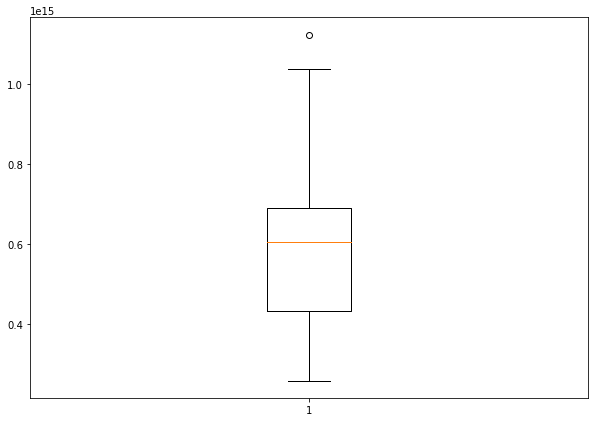

In [315]:
#express['Duration'] = pd.to_numeric(express['Duration'], downcast='integer')

plt.figure(figsize =(10, 7))
#plt.bar(x=express['Order_Date'], height=express['Duration'], color='black')
#plt.bar(x=standard['Order_Date'], height=standard['Duration'], color='red')
#plt.scatter(x=standard['Order_Date'], y=standard['Duration'])
plt.boxplot(express['Duration'])
#plt.ylim(2,14)
plt.show()

In [316]:
express['Duration'].describe()

count                           75
mean               7 days 01:16:48
std      2 days 03:43:46.892823809
min                3 days 00:00:00
25%                5 days 00:00:00
50%                7 days 00:00:00
75%                8 days 00:00:00
max               13 days 00:00:00
Name: Duration, dtype: object

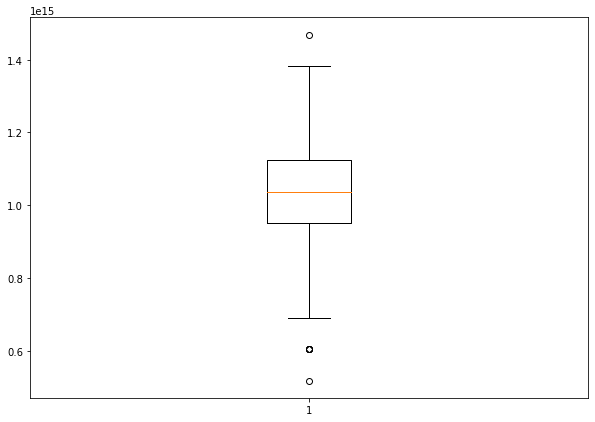

In [300]:
#standard['Duration'] = pd.to_numeric(standard['Duration'], downcast='integer')

plt.figure(figsize =(10, 7))
#plt.bar(x=express['Order_Date'], height=express['Duration'], color='black')
#plt.bar(x=standard['Order_Date'], height=standard['Duration'], color='red')
#plt.scatter(x=standard['Order_Date'], y=standard['Duration'])
plt.boxplot(standard['Duration'])
plt.show()

In [285]:
standard['Duration'].describe()

count                           258
mean     11 days 22:25:06.976744186
std       1 days 23:08:57.074858399
min                 6 days 00:00:00
25%                11 days 00:00:00
50%                12 days 00:00:00
75%                13 days 00:00:00
max                17 days 00:00:00
Name: Duration, dtype: object